<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/5_4_Dendrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

‚ñ∂Ô∏è ÏûêÎèôÏúºÎ°ú ÌåêÎã®Îêú Ï†àÎã® ÎÜíÏù¥ (cut height): 11.53


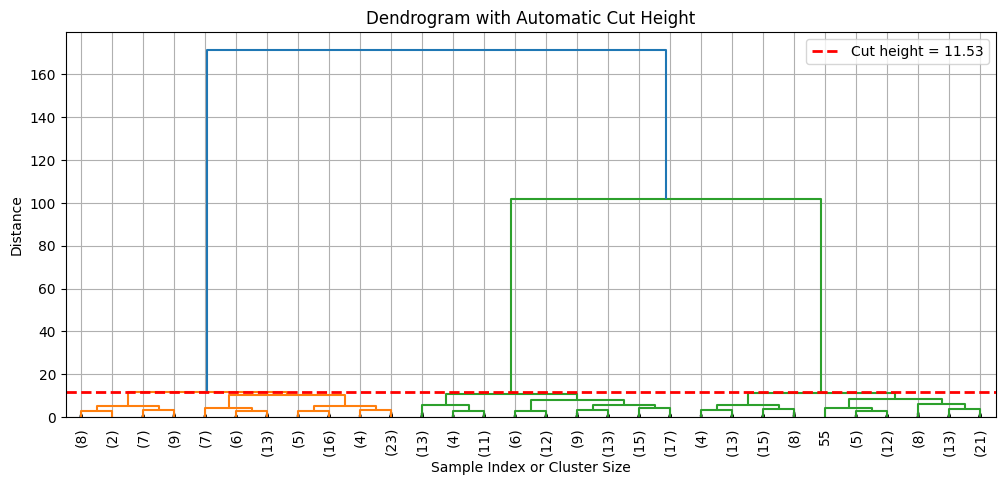

‚ñ∂Ô∏è ÏûêÎèôÏúºÎ°ú Í≤∞Ï†ïÎêú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 3Í∞ú


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

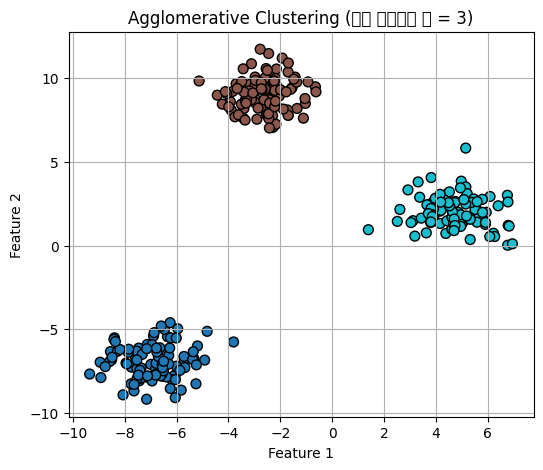

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from matplotlib import cm

# 1Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# 2Ô∏è‚É£ linkage matrix ÏÉùÏÑ±
linked = linkage(X, method='ward')

# 3Ô∏è‚É£ Î≥ëÌï© Í±∞Î¶¨ Î∞è Î≥ÄÌôîÎüâ Í≥ÑÏÇ∞
distances = linked[:, 2]
diff = np.diff(distances)
cut_height = distances[np.argmax(diff)]
print(f"‚ñ∂Ô∏è ÏûêÎèôÏúºÎ°ú ÌåêÎã®Îêú Ï†àÎã® ÎÜíÏù¥ (cut height): {cut_height:.2f}")

# 4Ô∏è‚É£ Îç¥ÎìúÎ°úÍ∑∏Îû® ÏãúÍ∞ÅÌôî (Ï†àÎã®ÏÑ† Ìè¨Ìï®)
plt.figure(figsize=(12, 5))
dendrogram(linked,
           truncate_mode='lastp',
           p=30,
           leaf_rotation=90.,
           leaf_font_size=10.,
           show_contracted=True)

# üî¥ Ï†àÎã® ÎÜíÏù¥ ÏãúÍ∞ÅÌôî (ÏàòÌèâÏÑ† Ï∂îÍ∞Ä)
plt.axhline(y=cut_height, color='red', linestyle='--', linewidth=2,
            label=f"Cut height = {cut_height:.2f}")
plt.title("Dendrogram with Automatic Cut Height")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.legend()
plt.grid(True)
plt.show()

# 5Ô∏è‚É£ ÌÅ¥Îü¨Ïä§ÌÑ∞ Ìï†Îãπ
cluster_labels = fcluster(linked, t=cut_height, criterion='distance')
n_clusters = len(np.unique(cluster_labels))
print(f"‚ñ∂Ô∏è ÏûêÎèôÏúºÎ°ú Í≤∞Ï†ïÎêú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {n_clusters}Í∞ú")

# 6Ô∏è‚É£ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap=cm.tab10, edgecolor='k', s=50)
plt.title(f"Agglomerative Clustering (ÏûêÎèô ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò = {n_clusters})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
